# Project_On 
# Global Superstore 2016

# Aim

#### The aim of this project is to analyse the data with respect to the sales and profit after filtering some of the columns.

##### The data 'global_superstore_2016' consists of 51290 entries (that is rows) and total 24 columns. The columns Order Date & Ship Date are not in one specific format and also in Datetime type,our job is to convert these columns to the Datetime objects first. 

##### And in the second stage, the columns 'Sales' and 'Profit' consist of special symbols like [  '$',"(", and ")"]
so will filter these columns and convert them into an either int or float type. After converting these columns into an int or float type remove the columns which are not necessary with respect the data analysis. After doing this cleaning process, we will analyse the data with respect to the following objectives.

###  Objectives:
1. Find Total, how many orders have cross the shipping cost of 500.
2. Count the number of segments, countries, regions, markets, categories, and sub-categories present in the global_superstore_2016 data.
3. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' after paying the Shipping Cost more than 500. 
4. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' the Sales greater than 500.
5. Find How many people from the State 'Karnataka' have bought the things under the category 'Technology'
6. Get the list of countries where the 'Profit' and 'Shipping Cost's are greater than or equal to 2000 and 300 respectively.
7. Find the list of Indian states where the people have purchased the things under the category Technology.
8. Find the overall rank of "India" where the 'Profit' is maximum under the category 'Technology'.
9. Display the data with min, max, average and std of 'Profit' & 'Sales' for each Sub-Category under each Category



#### Observe the columns 'Order Date' and 'Ship Date' :
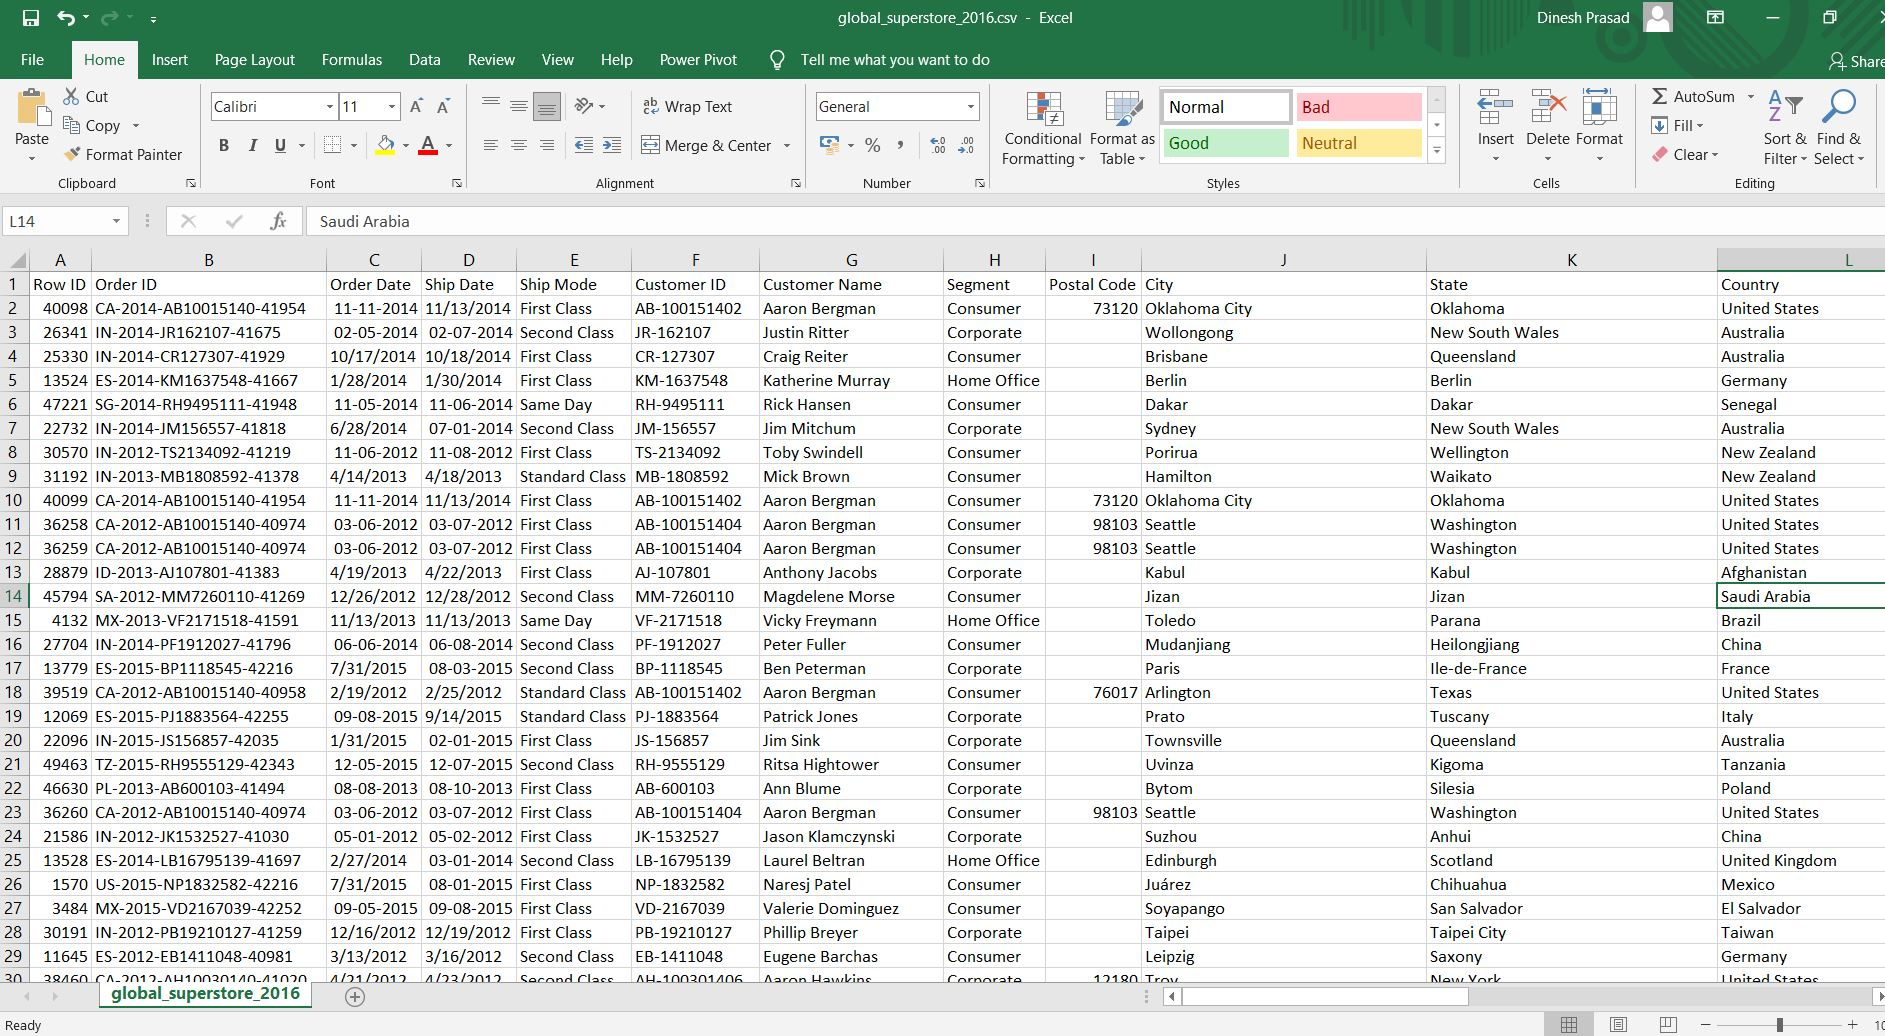
#### Observe the columns 'Sales' and 'Profit' :


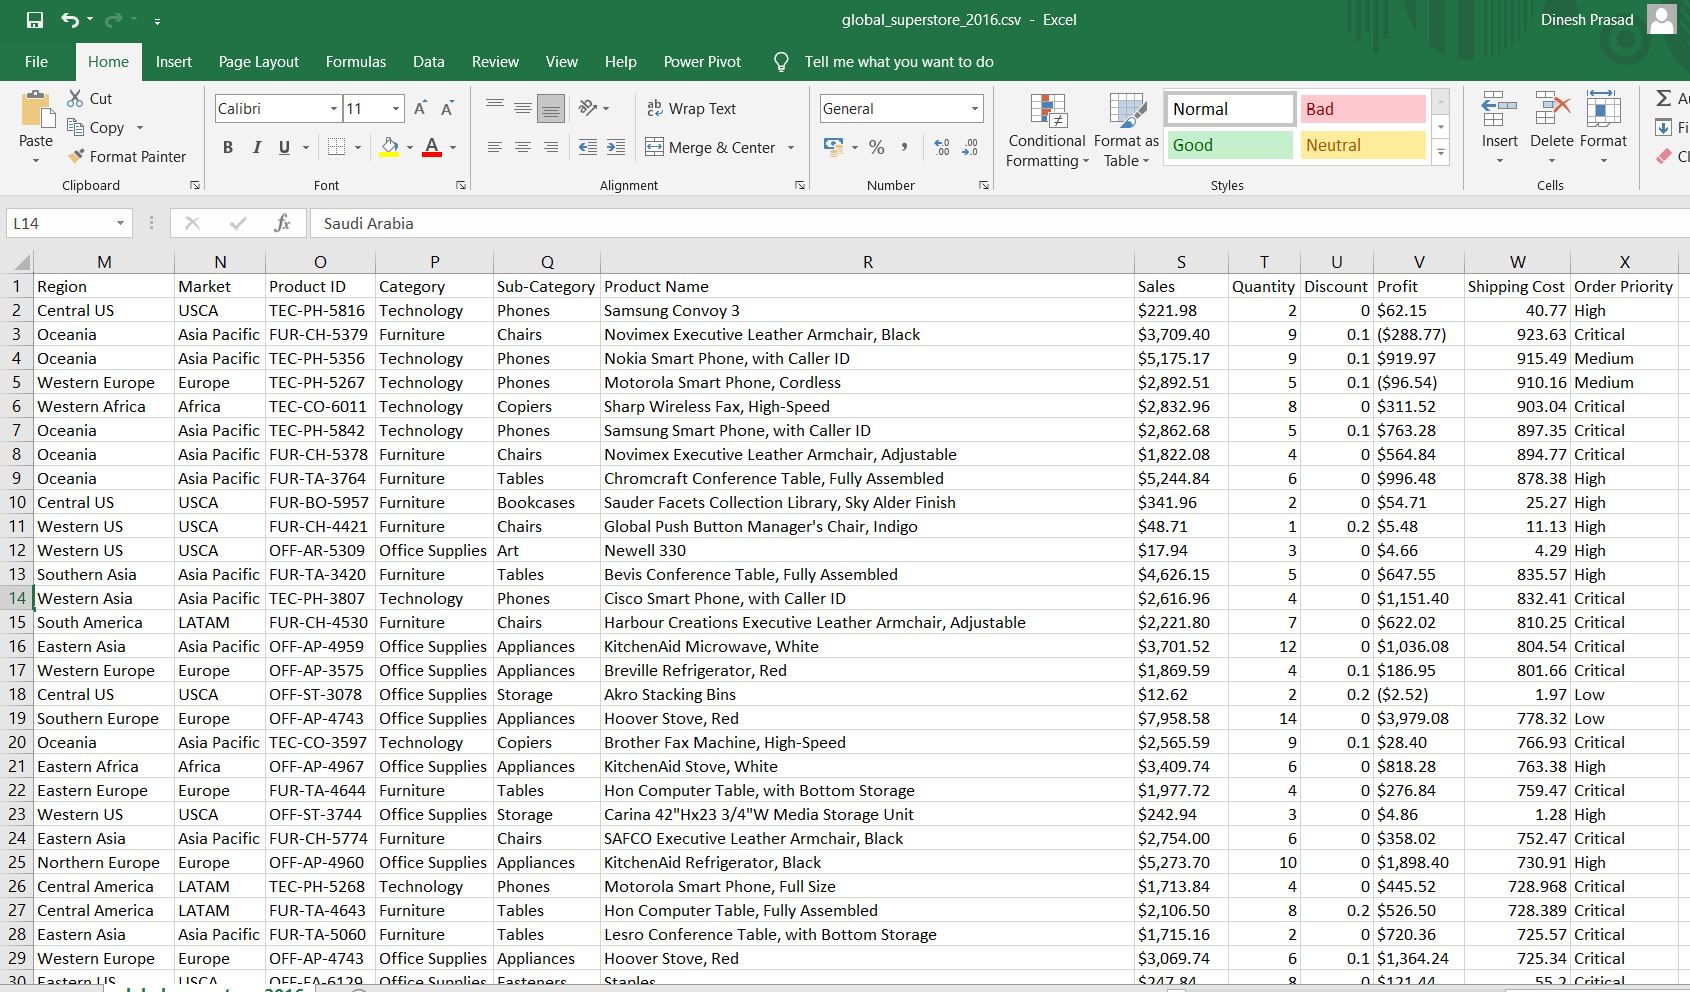

## Data Preprocessing And Cleaning 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('global_superstore_2016.csv', encoding='latin1')
df.shape

(51290, 24)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,($96.54),910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### observation
1. Postal Code contains Missing Values
2. Ship Date and Order Date are not in DateTime Format

In [6]:
df.describe()

,Row ID,Postal Code,Quantity,Discount,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [7]:
# convert the columns 'Order Date' & 'Ship Date' to a Datetime objectsShip Date
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
# Deleting unwnated columns
df.drop(columns=['Row ID','Postal Code','Customer ID'], inplace = True)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.63,Critical


In [11]:
df['Shipping Cost'].astype(int)[:10]

0     40
1    923
2    915
3    910
4    903
5    897
6    894
7    878
8     25
9     11
Name: Shipping Cost, dtype: int32

In [12]:
# check whether all the values of columns 'Sales' & 'Profit' contains $ symbol or not
if df['Sales'].str.contains('$').any():
    print("Yes: $ Symbol is Present in The Column Sales")

Yes: $ Symbol is Present in The Column Sales


In [13]:
if df['Profit'].str.contains('$').any():
    print("Yes: $ Symbol is Present in The Column Profit")

Yes: $ Symbol is Present in The Column Profit


In [14]:
# clean the columns 'Sales' & 'Profit' whcih consists of '$', '(', & ')' symbols
df['Profit'] = df['Profit'].str.replace('$','', regex=True)
df['Profit'][:10]

0      62.15 
1    (288.77)
2     919.97 
3     (96.54)
4     311.52 
5     763.28 
6     564.84 
7     996.48 
8      54.71 
9       5.48 
Name: Profit, dtype: object

In [15]:
df['Profit'] = df['Profit'].str.replace('(','',regex=True)
df['Profit'].head(10)

0     62.15 
1    288.77)
2    919.97 
3     96.54)
4    311.52 
5    763.28 
6    564.84 
7    996.48 
8     54.71 
9      5.48 
Name: Profit, dtype: object

In [16]:
df['Profit'] = df['Profit'].str.replace(')','',regex=True)
df['Profit'].head(20)

0        62.15 
1        288.77
2       919.97 
3         96.54
4       311.52 
5       763.28 
6       564.84 
7       996.48 
8        54.71 
9         5.48 
10        4.66 
11      647.55 
12    1,151.40 
13      622.02 
14    1,036.08 
15      186.95 
16         2.52
17    3,979.08 
18       28.40 
19      818.28 
Name: Profit, dtype: object

In [17]:
df['Profit'] = df['Profit'].str.replace(',','',regex=True)
df['Profit'][:20]

0       62.15 
1       288.77
2      919.97 
3        96.54
4      311.52 
5      763.28 
6      564.84 
7      996.48 
8       54.71 
9        5.48 
10       4.66 
11     647.55 
12    1151.40 
13     622.02 
14    1036.08 
15     186.95 
16        2.52
17    3979.08 
18      28.40 
19     818.28 
Name: Profit, dtype: object

In [18]:
df['Sales'] = df['Sales'].str.replace('$', '',regex=True)
df['Sales'][:10]

0      221.98 
1    3,709.40 
2    5,175.17 
3    2,892.51 
4    2,832.96 
5    2,862.68 
6    1,822.08 
7    5,244.84 
8      341.96 
9       48.71 
Name: Sales, dtype: object

In [19]:
df['Sales'] = df['Sales'].str.replace(',', '', regex=True)
df['Sales'][:10]

0     221.98 
1    3709.40 
2    5175.17 
3    2892.51 
4    2832.96 
5    2862.68 
6    1822.08 
7    5244.84 
8     341.96 
9      48.71 
Name: Sales, dtype: object

In [20]:
# After removing the symbols, convert them to a numeric columns and of type 'int'

In [21]:
df['Sales'] = pd.to_numeric(df['Sales'], downcast='signed')
df['Sales'].head(10)

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: Sales, dtype: float64

In [22]:
df['Profit'] = pd.to_numeric(df['Sales'], downcast = 'integer')
df['Profit'].head(10)

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: Profit, dtype: float64

In [23]:
df['Profit'] = df['Profit'].astype(int)
df['Sales'] =  df['Sales'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer Name   51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Region          51290 non-null  object        
 10  Market          51290 non-null  object        
 11  Product ID      51290 non-null  object        
 12  Category        51290 non-null  object        
 13  Sub-Category    51290 non-null  object        
 14  Product Name    51290 non-null  object        
 15  Sa

### Analysis with the project begin

#### 1. Find total how many orders have cross the shipping cost of 500.

In [25]:
condi= (df['Shipping Cost']>500)
shipping=df[condi]

In [26]:
shipping.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709,9,0.1,3709,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175,9,0.1,5175,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892,5,0.1,2892,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832,8,0.0,2832,903.04,Critical
5,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,Oceania,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862,5,0.1,2862,897.35,Critical


In [27]:
len(shipping)

120

In [28]:
shipping.shape

(120, 21)

#### 2. Count the number of segments, countries, regions, markets, categories, and sub-categories present in the global_superstore_2016 data.

In [29]:
df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [30]:
len(df['Segment'].value_counts())

3

In [31]:
df['Country'].value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2635
Germany          2063
                 ... 
Kuwait              1
Bhutan              1
Suriname            1
Malawi              1
The Gambia          1
Name: Country, Length: 165, dtype: int64

In [32]:
len(df['Country'].value_counts())

165

In [33]:
df['Region'].value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

In [34]:
len(df['Region'].value_counts())

23

In [35]:
df['Market'].value_counts()

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

In [36]:
len(df['Market'].value_counts())

5

In [37]:
df['Category'].value_counts()

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

In [38]:
len(df['Category'].value_counts())

3

In [39]:
df['Sub-Category'].value_counts()

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [40]:
len(df['Sub-Category'].value_counts())

17

#### 3. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology' after paying the Shipping Cost more than 500.

In [41]:
condition =(df['Country']=='India')&( df['Category']=='Technology')&(df['Shipping Cost']>=500)
indian_df=df[condition]

In [42]:
indian_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
41,IN-2015-BF1100558-42319,2015-11-11,2015-11-15,Standard Class,Barry Franz,Home Office,Gorakhpur,Haryana,India,Southern Asia,...,TEC-PH-5269,Technology,Phones,"Motorola Smart Phone, with Caller ID",4518,7,0.0,4518,658.69,High
48,IN-2015-SW2027558-42125,2015-05-01,2015-05-01,Same Day,Scott Williamson,Consumer,Jamshedpur,Jharkhand,India,Southern Asia,...,TEC-MA-5007,Technology,Machines,"Konica Inkjet, White",2174,7,0.0,2174,637.86,Critical
55,IN-2013-SG2047058-41424,2013-05-30,2013-05-31,First Class,Sheri Gordon,Consumer,Bhopal,Madhya Pradesh,India,Southern Asia,...,TEC-CO-4590,Technology,Copiers,"Hewlett Wireless Fax, Color",1526,4,0.0,1526,625.77,Critical
90,IN-2013-GP1474058-41419,2013-05-25,2013-05-28,Second Class,Guy Phonely,Corporate,Delhi,Delhi,India,Southern Asia,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",1916,3,0.0,1916,548.40,Critical


In [43]:
OrderID_list = indian_df['Order ID'].tolist()
OrderID_list

['IN-2015-BF1100558-42319',
 'IN-2015-SW2027558-42125',
 'IN-2013-SG2047058-41424',
 'IN-2013-GP1474058-41419']

#### 4. Get the list of Order ID's where the Indian customer's have bought the things under the category 'Technology'  where the Sales is greater than 500.

In [44]:
condition =(df['Country']=='India')&( df['Category']=='Technology')&(df['Sales']>=500)
indian_df=df[condition]

In [45]:
OrderID_list = indian_df['Order ID'].tolist()
OrderID_list[:20]

['IN-2015-BF1100558-42319',
 'IN-2015-SW2027558-42125',
 'IN-2013-SG2047058-41424',
 'IN-2013-GP1474058-41419',
 'IN-2014-SV2081558-41968',
 'IN-2015-AP1072058-42284',
 'IN-2015-CR1282058-42294',
 'IN-2012-AB1010558-41270',
 'IN-2014-CA1277558-41802',
 'IN-2015-AF1088558-42222',
 'IN-2012-CL1270058-41226',
 'IN-2012-MG1820558-40962',
 'IN-2015-CY1274558-42300',
 'IN-2014-MR1754558-41954',
 'IN-2015-CC1247558-42129',
 'IN-2013-NZ1856558-41398',
 'IN-2012-DM1352558-41123',
 'IN-2013-DL1333058-41328',
 'IN-2013-BW1111058-41404',
 'IN-2014-JE1561058-41895']

In [46]:
len(OrderID_list)

163

#### 5. How many people from the State 'Karnataka' have bought the things under the category 'Technology'.

In [47]:
condition = (df['Country']=='India')&(df['State']=='Karnataka')&(df['Category']=='Technology')
karnataka_df = df[condition]

In [48]:
karnataka_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
408,IN-2015-CY1274558-42300,2015-10-23,2015-10-25,First Class,Craig Yedwab,Corporate,Bangalore,Karnataka,India,Southern Asia,...,TEC-CO-4578,Technology,Copiers,"Hewlett Fax Machine, Laser",959,3,0.0,959,317.81,Critical
782,IN-2015-JW1522058-42101,2015-04-07,2015-04-12,Standard Class,Jane Waco,Corporate,Mangalore,Karnataka,India,Southern Asia,...,TEC-PH-3807,Technology,Phones,"Cisco Smart Phone, with Caller ID",3271,5,0.0,3271,232.45,High
1957,IN-2014-RA1928558-41863,2014-08-12,2014-08-16,Standard Class,Ralph Arnett,Consumer,Mangalore,Karnataka,India,Southern Asia,...,TEC-CO-4791,Technology,Copiers,"HP Wireless Fax, High-Speed",1075,3,0.0,1075,136.45,High
2364,IN-2014-BO1135058-41783,2014-05-24,2014-05-30,Standard Class,Bill Overfelt,Corporate,Bangalore,Karnataka,India,Southern Asia,...,TEC-CO-3608,Technology,Copiers,"Brother Wireless Fax, Color",1140,3,0.0,1140,119.46,Medium
3200,IN-2014-CM1238558-41755,2014-04-26,2014-04-28,Second Class,Christopher Martinez,Consumer,Bangalore,Karnataka,India,Southern Asia,...,TEC-CO-4769,Technology,Copiers,"HP Fax and Copier, Color",697,4,0.0,697,94.93,High


In [49]:
karnataka_df.shape

(21, 21)

In [50]:
len(karnataka_df)

21

#### 6. Get the list of countries where the 'Profit' and 'Shipping Cost's are greater than or equal to 2000 and 300 respectively.

In [51]:
condition=(df['Profit'] >= 2000) & (df['Shipping Cost'] >= 300)
data = df[condition]

In [52]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709,9,0.1,3709,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175,9,0.1,5175,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892,5,0.1,2892,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832,8,0.0,2832,903.04,Critical
5,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,Oceania,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862,5,0.1,2862,897.35,Critical


In [53]:
list_df = data['Country'].drop_duplicates().tolist()
list_df[:20]

['Australia',
 'Germany',
 'Senegal',
 'New Zealand',
 'Afghanistan',
 'Saudi Arabia',
 'Brazil',
 'China',
 'Italy',
 'Tanzania',
 'United Kingdom',
 'El Salvador',
 'France',
 'Democratic Republic of the Congo',
 'Indonesia',
 'India',
 'Uruguay',
 'Iran',
 'Taiwan',
 'Mozambique']

#### 7. Find the list of Indian states where the people have purchased the things under the category Technology.

In [54]:
indian_states = df[(df['Country']=='India')&(df['Category']=='Technology')]

In [55]:
indian_states_list = indian_states['State'].drop_duplicates().tolist()
indian_states_list

['Haryana',
 'Jharkhand',
 'Madhya Pradesh',
 'Delhi',
 'Gujarat',
 'Bihar',
 'Kerala',
 'Chhattisgarh',
 'Tamil Nadu',
 'West Bengal',
 'Maharashtra',
 'Karnataka',
 'Rajasthan',
 'Uttar Pradesh',
 'Andhra Pradesh',
 'Telangana',
 'Odisha',
 'Punjab',
 'Assam',
 'Uttarakhand',
 'Puducherry',
 'Jammu and Kashmir']

In [56]:
len(indian_states_list)

22

#### 8. Find the overall rank of "India" where the 'Profit' is maximum under the category 'Technology'. 

In [57]:
print('Max Profit:', max(df['Profit']))
print('Min Profit:', min(df['Profit']))

Max Profit: 22638
Min Profit: 0


In [58]:
rank_df = df[(df['Category']=='Technology')& (df['Profit']>0)]

In [59]:
rank_df = rank_df.sort_values(by=['Profit'], ascending =False)

In [60]:
rank_df_list= rank_df['Country'].drop_duplicates().tolist()

In [61]:
rank_df_list[:10]

['United States',
 'Japan',
 'New Zealand',
 'United Kingdom',
 'India',
 'China',
 'Spain',
 'Morocco',
 'Saudi Arabia',
 'Australia']

#### 9. Display the data with min, max, average and std of 'Profit' & 'Sales' for each Sub-Category under each Category

In [62]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [63]:
global_data = df.groupby(by=['Country','Category','Sub-Category'], as_index=True)
global_data

In [64]:
function = [('min_value', 'min'),('max_value', 'max'),('mean_value', 'mean'),('std_value', 'std')]

In [65]:
global_data['Sales', 'Profit'].agg(function)

<ipython-input-65-9bb11f36b71a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  global_data['Sales', 'Profit'].agg(function)


Sales                         \
                                         min_value max_value   mean_value   
Country     Category        Sub-Category                                    
Afghanistan Furniture       Bookcases          731      2070  1400.500000   
                            Chairs             417       914   665.500000   
                            Furnishings         84       219   134.500000   
                            Tables             267      4626  2113.333333   
            Office Supplies Appliances         669       669   669.000000   
...                                            ...       ...          ...   
Zimbabwe    Office Supplies Supplies            10        66    37.833333   
            Technology      Accessories         77        77    77.000000   
                            Copiers            154       444   299.000000   
                            Machines            14       104    52.500000   
                            Phones              21       101    61.000000   

                                                         Profit            \
                                            std_value min_value max_value   
Country     Category        Sub-Category                                    
Afghanistan Furniture       Bookcases      946.815980       731      2070   
                            Chairs         351.432070       417       914   
                            Furnishings     51.251341        84       219   
                            Tables        2254.599817       267      4626   
            Office Supplies Appliances            NaN       669       669   
...                                               ...       ...       ...   
Zimbabwe    Office Supplies Supplies        25.031314        10        66   
            Technology      Accessories           NaN        77        77   
                            Copiers        205.060967       154       444   
                            Machines        42.696604        14       104   
                            Phones          56.568542        21       101   

                                                                    
                                           mean_value    std_value  
Country     Category        Sub-Category                            
Afghanistan Furniture       Bookcases     1400.500000   946.815980  
                            Chairs         665.500000   351.432070  
                            Furnishings    134.500000    51.251341  
                            Tables        2113.333333  2254.599817  
            Office Supplies Appliances     669.000000          NaN  
...                                               ...          ...  
Zimbabwe    Office Supplies Supplies        37.833333    25.031314  
            Technology      Accessories     77.000000          NaN  
                            Copiers        299.000000   205.060967  
                            Machines        52.500000    42.696604  
                            Phones          61.000000    56.568542  

[2009 rows x 8 columns]

In [66]:
global_data.head(20)

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221,2,0.0,221,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709,9,0.1,3709,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175,9,0.1,5175,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892,5,0.1,2892,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832,8,0.0,2832,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51244,KZ-2012-LS723068-41261,2012-12-18,2012-12-20,First Class,Lycoris Saunders,Consumer,Kokshetau,Aqmola,Kazakhstan,Central Asia,...,OFF-BI-3717,Office Supplies,Binders,"Cardinal Binder Covers, Durable",4,1,0.7,4,1.05,High
51245,IN-2012-MV1748597-41215,2012-11-02,2012-11-04,Second Class,Mark Van Huff,Consumer,Peshawar,Khyber Pakhtunkhwa,Pakistan,Southern Asia,...,OFF-LA-5382,Office Supplies,Labels,"Novimex File Folder Labels, 5000 Label Set",17,4,0.5,17,1.05,Medium
51255,ID-2014-JF15355118-41870,2014-08-19,2014-08-23,Standard Class,Jay Fein,Consumer,Seoul,Seoul,South Korea,Eastern Asia,...,OFF-LA-4533,Office Supplies,Labels,"Harbour Creations File Folder Labels, 5000 Lab...",4,1,0.5,4,1.04,Medium
51256,ID-2015-JE1561097-42193,2015-07-08,2015-07-13,Standard Class,Jim Epp,Corporate,Lahore,Punjab,Pakistan,Southern Asia,...,OFF-PA-4471,Office Supplies,Paper,"Green Bar Memo Slips, Multicolor",18,2,0.5,18,1.04,Medium
